In [5]:
# Import the libraries needed
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# connect the dataset
dataset = pd.read_csv('/content/drive/MyDrive/IA_764/examScores.csv').values

# make it a 2-D array of size N x D where D = 1
x = dataset[:,0].reshape(-1,1)
y = dataset[:,1]

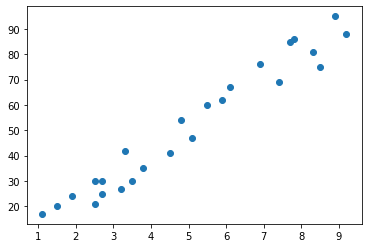

In [7]:
# plot the data set
plt.scatter(x, y)

In [9]:
# let create the linear regression
# the model
regressor=LinearRegression()
regressor.fit(x,y)

# let try making a prediction
regressor.predict([[5.5]])

array([56.25059205])

In [10]:
# Printing weights
print(regressor.intercept_)
print(regressor.coef_)

2.48367340537321
[9.77580339]


In [11]:
# Now lets define our Tensorflow model
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=1,input_shape=[1])
])

In [19]:
# Specifying learning rate and momentum for SGD
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),loss='mse')

In [18]:
#learning rate scheduler
def schedule(epoch,lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule) 

In [ ]:
# Train the model
# Fit function has a parameter for batch_size. 
# If unspecified batch_sizewill default to 32.
r = model.fit(x,y, epochs=200, callbacks=[scheduler])

In [21]:
# Printing the weights
print(model.layers[0].get_weights())

[array([[9.912359]], dtype=float32), array([1.6391275], dtype=float32)]


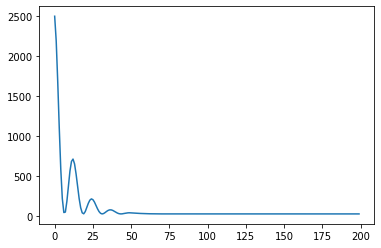

In [22]:
# Plot the loss
plt.plot(r.history['loss'])

In [23]:
# Prediction
model.predict([[5.5]])

array([[56.1571]], dtype=float32)